In [6]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

openjdk-8-jdk-headless is already the newest version (8u402-ga-2ubuntu1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [8]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [9]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [12]:
!ls /content
# to see what are the contents of our current location.

hcvdat0.csv  sample_data


In [13]:
# Load our dataset
df = spark.read.csv("hcvdat0.csv", header=True, inferSchema=True)

In [14]:
df.show() # preview the dataset

+---+-------------+---+---+----+----+----+----+----+-----+----+-----+----+----+
|_c0|     Category|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|
+---+-------------+---+---+----+----+----+----+----+-----+----+-----+----+----+
|  1|0=Blood Donor| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|
|  2|0=Blood Donor| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|
|  3|0=Blood Donor| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|
|  4|0=Blood Donor| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|
|  5|0=Blood Donor| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|
|  6|0=Blood Donor| 32|  m|41.6|43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|  74|
|  7|0=Blood Donor| 32|  m|46.3|41.3|17.5|17.8| 8.5| 7.01|4.79| 70.0|16.9|74.5|
|  8|0=Blood Donor| 32|  m|42.2|41.9|35.8|31.1|16.1| 5.82| 4.6|109.0|21.5|67.1|
|  9|0=Blood Donor| 32|  m|50.9|65.5|23.2|21.2| 6.9| 8.69| 4.1| 83.0|13.7|71.3|
| 10|0=Blood Donor| 32|  m|42.4|86.3|20.

In [15]:
# checking for columns -- we will use them in the next steps
print(df.columns)

['_c0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [16]:
# Rearranging for our ease
df = df.select('Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT','Category')

In [17]:
df.show(5)

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
only showing top 5 rows



In [18]:
# After InferSchema
df.dtypes

[('Age', 'int'),
 ('Sex', 'string'),
 ('ALB', 'string'),
 ('ALP', 'string'),
 ('ALT', 'string'),
 ('AST', 'double'),
 ('BIL', 'double'),
 ('CHE', 'double'),
 ('CHOL', 'string'),
 ('CREA', 'double'),
 ('GGT', 'double'),
 ('PROT', 'string'),
 ('Category', 'string')]

In [19]:
# Summary of the description
print(df.describe().show())

+-------+------------------+----+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-------------+
|summary|               Age| Sex|              ALB|               ALP|               ALT|              AST|               BIL|               CHE|              CHOL|             CREA|              GGT|             PROT|     Category|
+-------+------------------+----+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-------------+
|  count|               615| 615|              615|               615|               615|              615|               615|               615|               615|              615|              615|              615|          615|
|   mean| 47.40813008130081|NULL|41.62019543973941| 68.2839195979899

In [20]:
# Counting the variables
df.groupBy('Category').count().show()

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|       0=Blood Donor|  533|
|         3=Cirrhosis|   30|
|          2=Fibrosis|   21|
|0s=suspect Blood ...|    7|
|         1=Hepatitis|   24|
+--------------------+-----+



Feature Engineering:
- Numberical Values
- Vectorization
- Scaling

In [21]:
import pyspark.ml
dir(pyspark.ml)

['Estimator',
 'Model',
 'Pipeline',
 'PipelineModel',
 'PredictionModel',
 'Predictor',
 'TorchDistributor',
 'Transformer',
 'UnaryTransformer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'classification',
 'clustering',
 'common',
 'evaluation',
 'feature',
 'fpm',
 'image',
 'linalg',
 'param',
 'pipeline',
 'recommendation',
 'regression',
 'stat',
 'torch',
 'tree',
 'tuning',
 'util',
 'wrapper']

In [22]:
# Loading the ML packages we will need
from pyspark.ml.feature import VectorAssembler,StringIndexer
df.show(4)

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
only showing top 4 rows



In [23]:
# Getting the unique Values for Sex
df.select('Sex').distinct().show()

+---+
|Sex|
+---+
|  m|
|  f|
+---+



In [24]:
# Converting the string into numerical code
genderEncoder = StringIndexer(inputCol='Sex',outputCol='Gender').fit(df)

In [25]:
df.show(5)

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
only showing top 5 rows



In [26]:
# Encoding for Category now
catEncoder = StringIndexer(inputCol='Category',outputCol='Target').fit(df)
df = catEncoder.transform(df)

In [27]:
df.show(5)

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|Target|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|   0.0|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|   0.0|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|   0.0|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|   0.0|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|   0.0|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
only showing top 5 rows



In [28]:
# Geting the labels
catEncoder.labels

['0=Blood Donor',
 '3=Cirrhosis',
 '1=Hepatitis',
 '2=Fibrosis',
 '0s=suspect Blood Donor']

In [29]:
# Index_Tod_String now
from pyspark.ml.feature import IndexToString

In [30]:
converter = IndexToString(inputCol='Target',outputCol='orig_cat')
converted_df = converter.transform(df)
converted_df.show()

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+-------------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|Target|     orig_cat|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+-------------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|   0.0|0=Blood Donor|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|   0.0|0=Blood Donor|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|   0.0|0=Blood Donor|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|   0.0|0=Blood Donor|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|   0.0|0=Blood Donor|
| 32|  m|41.6|43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|  74|0=Blood Donor|   0.0|0=Blood Donor|
| 32|  m|46.3|41.3|17.5|17.8| 8.5| 7.01|4.79| 70.0|16.9|74.5|0=Blood Donor|   0.0|0=Blood Donor|
| 32|  m|42.2|41.9|35.8|31.1|1

In [31]:
# our features
df.show()

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|Target|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|   0.0|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|   0.0|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|   0.0|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|   0.0|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|   0.0|
| 32|  m|41.6|43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|  74|0=Blood Donor|   0.0|
| 32|  m|46.3|41.3|17.5|17.8| 8.5| 7.01|4.79| 70.0|16.9|74.5|0=Blood Donor|   0.0|
| 32|  m|42.2|41.9|35.8|31.1|16.1| 5.82| 4.6|109.0|21.5|67.1|0=Blood Donor|   0.0|
| 32|  m|50.9|65.5|23.2|21.2| 6.9| 8.69| 4.1| 83.0|13.7|71.3|0=Blood Donor|   0.0|
| 32

In [32]:
print(df.columns)

['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Category', 'Target']


In [33]:
df.dtypes

[('Age', 'int'),
 ('Sex', 'string'),
 ('ALB', 'string'),
 ('ALP', 'string'),
 ('ALT', 'string'),
 ('AST', 'double'),
 ('BIL', 'double'),
 ('CHE', 'double'),
 ('CHOL', 'string'),
 ('CREA', 'double'),
 ('GGT', 'double'),
 ('PROT', 'string'),
 ('Category', 'string'),
 ('Target', 'double')]

In [34]:
df2 = df.select('Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Target')


In [35]:
df2.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- ALB: string (nullable = true)
 |-- ALP: string (nullable = true)
 |-- ALT: string (nullable = true)
 |-- AST: double (nullable = true)
 |-- BIL: double (nullable = true)
 |-- CHE: double (nullable = true)
 |-- CHOL: string (nullable = true)
 |-- CREA: double (nullable = true)
 |-- GGT: double (nullable = true)
 |-- PROT: string (nullable = true)
 |-- Target: double (nullable = false)



In [36]:
df2 = df2.toPandas().replace('NA',0).astype(float)

In [37]:
type(df2) # converted

pandas.core.frame.DataFrame

In [38]:
type(df)

pyspark.sql.dataframe.DataFrame

In [39]:
# Converting To PySpark Dataframe
new_df = spark.createDataFrame(df2)
new_df.show()

+----+----+----+----+----+----+-----+----+-----+----+----+------+
| Age| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|Target|
+----+----+----+----+----+----+-----+----+-----+----+----+------+
|32.0|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|69.0|   0.0|
|32.0|38.5|70.3|18.0|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|   0.0|
|32.0|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|   0.0|
|32.0|43.2|52.0|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|   0.0|
|32.0|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|   0.0|
|32.0|41.6|43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|74.0|   0.0|
|32.0|46.3|41.3|17.5|17.8| 8.5| 7.01|4.79| 70.0|16.9|74.5|   0.0|
|32.0|42.2|41.9|35.8|31.1|16.1| 5.82| 4.6|109.0|21.5|67.1|   0.0|
|32.0|50.9|65.5|23.2|21.2| 6.9| 8.69| 4.1| 83.0|13.7|71.3|   0.0|
|32.0|42.4|86.3|20.3|20.0|35.2| 5.46|4.45| 81.0|15.9|69.9|   0.0|
|32.0|44.3|52.3|21.7|22.4|17.2| 4.15|3.57| 78.0|24.1|75.4|   0.0|
|33.0|46.4|68.2|10.3|20.0| 5.7| 7.36| 4.3| 79.0|18.7|68.6|   0.0|
|33.0|36.3

In [40]:
# Check For DTYpes and Schema
new_df.printSchema()

root
 |-- Age: double (nullable = true)
 |-- ALB: double (nullable = true)
 |-- ALP: double (nullable = true)
 |-- ALT: double (nullable = true)
 |-- AST: double (nullable = true)
 |-- BIL: double (nullable = true)
 |-- CHE: double (nullable = true)
 |-- CHOL: double (nullable = true)
 |-- CREA: double (nullable = true)
 |-- GGT: double (nullable = true)
 |-- PROT: double (nullable = true)
 |-- Target: double (nullable = true)



In [41]:
required_features = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Target']

In [42]:
# VectorAsm
vec_assembler = VectorAssembler(inputCols=required_features,outputCol='features')

In [43]:
vec_df = vec_assembler.transform(new_df)
vec_df.show(5)

+----+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
| Age| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|Target|            features|
+----+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
|32.0|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|69.0|   0.0|[32.0,38.5,52.5,7...|
|32.0|38.5|70.3|18.0|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|   0.0|[32.0,38.5,70.3,1...|
|32.0|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|   0.0|[32.0,46.9,74.7,3...|
|32.0|43.2|52.0|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|   0.0|[32.0,43.2,52.0,3...|
|32.0|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|   0.0|[32.0,39.2,74.1,3...|
+----+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
only showing top 5 rows



Split, Build, Train and Test our model

In [44]:
train_df,test_df = vec_df.randomSplit([0.7,0.3])
train_df.count()

410

In [45]:
train_df.select('Target').distinct().show()


+------+
|Target|
+------+
|   0.0|
|   1.0|
|   4.0|
|   3.0|
|   2.0|
+------+



In [46]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Re-define the logistic regression model for multi-class classification
lr = LogisticRegression(featuresCol='features', labelCol='Target', family='multinomial')

# Createing a parameter grid for tuning
paramGrid = (ParamGridBuilder()
    .addGrid(lr.regParam, [0.01, 0.1, 0.5])  # Regularization parameter
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])  # Elastic net mixing parameter
    .addGrid(lr.maxIter, [10, 50, 100])  # Maximum number of iterations
    .build())

# Define the evaluator for multi-class classification
evaluator = MulticlassClassificationEvaluator(
    labelCol='Target',
    predictionCol='prediction',
    metricName='accuracy'
)

# Setup cross-validation with 3 folds
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)  # Number of folds for cross-validation

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(train_df)

# Print out the best model's parameters
bestModel = cvModel.bestModel
print("Best Model Parameters:")
print(f" - regParam: {bestModel._java_obj.getRegParam()}")
print(f" - elasticNetParam: {bestModel._java_obj.getElasticNetParam()}")
print(f" - maxIter: {bestModel._java_obj.getMaxIter()}")


Best Model Parameters:
 - regParam: 0.01
 - elasticNetParam: 1.0
 - maxIter: 50


In [47]:
# Evaluating the model on the test set
predictions = cvModel.transform(test_df)
evaluator = MulticlassClassificationEvaluator(labelCol="Target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))
print("Test set F1-Score = " + str(evaluator.setMetricName("f1").evaluate(predictions)))


Test set accuracy = 0.975609756097561
Test set F1-Score = 0.9751420637666037


visualize the model's performance across different classes


Text(95.72222222222221, 0.5, 'Truth')

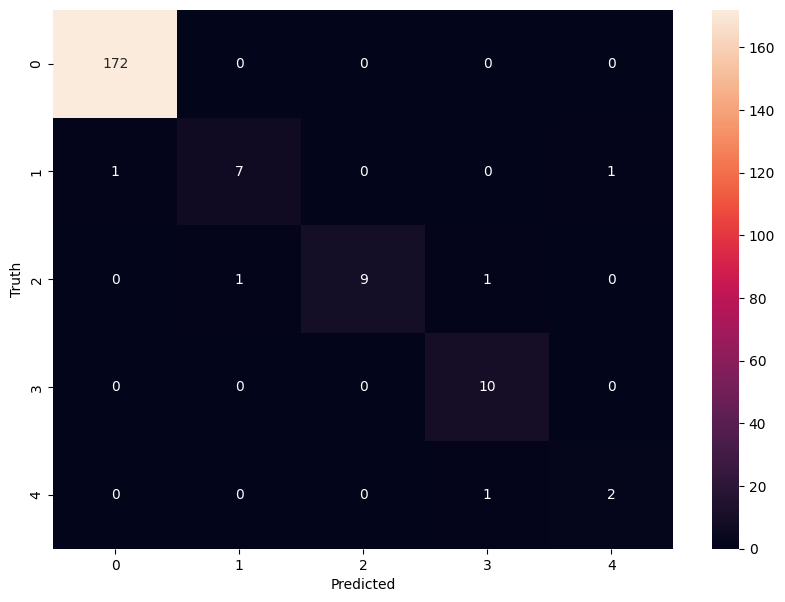

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = predictions.select("Target").collect()
y_pred = predictions.select("prediction").collect()
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [49]:
cvModel.bestModel.save("myModelPath")


In [50]:
from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier

# Our logistic Model
lr = LogisticRegression(featuresCol='features',labelCol='Target')

In [51]:
lr_model = lr.fit(train_df)
y_pred = lr_model.transform(test_df)
y_pred.show()

+----+----+-----+----+----+----+-----+----+-----+----+----+------+--------------------+--------------------+--------------------+----------+
| Age| ALB|  ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|Target|            features|       rawPrediction|         probability|prediction|
+----+----+-----+----+----+----+-----+----+-----+----+----+------+--------------------+--------------------+--------------------+----------+
|32.0|38.5| 70.3|18.0|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|   0.0|[32.0,38.5,70.3,1...|[102.007616900173...|[1.0,5.6457715031...|       0.0|
|32.0|41.6| 43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|74.0|   0.0|[32.0,41.6,43.3,1...|[76.0763425413011...|[0.99999999862010...|       0.0|
|32.0|44.3| 52.3|21.7|22.4|17.2| 4.15|3.57| 78.0|24.1|75.4|   0.0|[32.0,44.3,52.3,2...|[87.2694998887957...|[1.0,1.5264578241...|       0.0|
|33.0|36.3| 78.6|23.6|22.0| 7.0| 8.56|5.38| 78.0|19.4|68.7|   0.0|[33.0,36.3,78.6,2...|[100.905406028492...|[1.0,2.2688340067...|       0.0|
|33.0|39.0| 5

In [52]:
print(y_pred.columns)

['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Target', 'features', 'rawPrediction', 'probability', 'prediction']


In [53]:
y_pred.select('target','rawPrediction', 'probability', 'prediction').show()

+------+--------------------+--------------------+----------+
|target|       rawPrediction|         probability|prediction|
+------+--------------------+--------------------+----------+
|   0.0|[102.007616900173...|[1.0,5.6457715031...|       0.0|
|   0.0|[76.0763425413011...|[0.99999999862010...|       0.0|
|   0.0|[87.2694998887957...|[1.0,1.5264578241...|       0.0|
|   0.0|[100.905406028492...|[1.0,2.2688340067...|       0.0|
|   0.0|[94.4617760856992...|[1.0,1.1528653729...|       0.0|
|   0.0|[89.1808150384426...|[1.0,6.5061643638...|       0.0|
|   0.0|[108.881879842755...|[1.0,3.2810763383...|       0.0|
|   0.0|[77.2325656214585...|[1.0,3.9790366938...|       0.0|
|   0.0|[86.9202021051513...|[1.0,2.2966246985...|       0.0|
|   0.0|[88.9450041908590...|[1.0,1.0889687489...|       0.0|
|   0.0|[89.6940009140201...|[1.0,1.8710262235...|       0.0|
|   0.0|[94.8065268479732...|[1.0,1.3698949994...|       0.0|
|   0.0|[111.376250270965...|[1.0,1.0414143017...|       0.0|
|   0.0|

Now we Evaluate our model

In [54]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Checking For Accuracy
multi_evaluator = MulticlassClassificationEvaluator(labelCol='Target',metricName='accuracy')

In [55]:
multi_evaluator.evaluate(y_pred)

0.9512195121951219

In [56]:
print("Model has great accuracy! Almost 95%!")

Model has great accuracy! Almost 95%!


In [57]:
from pyspark.mllib.evaluation import MulticlassMetrics

lr_metric = MulticlassMetrics(y_pred['target', 'prediction'].rdd)
dir(lr_metric)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_java_model',
 '_sc',
 'accuracy',
 'call',
 'confusionMatrix',
 'fMeasure',
 'falsePositiveRate',
 'logLoss',
 'precision',
 'recall',
 'truePositiveRate',
 'weightedFMeasure',
 'weightedFalsePositiveRate',
 'weightedPrecision',
 'weightedRecall',
 'weightedTruePositiveRate']

In [58]:
print("Accuracy",lr_metric.accuracy)

Accuracy 0.9512195121951219


In [59]:
print("Precision",lr_metric.precision(1.0))
print("Recall",lr_metric.recall(1.0))
print("F1Score",lr_metric.fMeasure(1.0))

Precision 0.8888888888888888
Recall 0.7272727272727273
F1Score 0.7999999999999999


In [60]:
dir(lr_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_call_java',
 '_checkThresholdConsistency',
 '_copyValues',
 '_copy_params',
 '_create_from_java_class',
 '_create_params_from_java',
 '_defaultParamMap',
 '_dummy',
 '_empty_java_param_map',
 '_from_java',
 '_is_protocol',
 '_java_obj',
 '_make_java_param_pair',
 '_new_java_array',
 '_new_java_obj',
 '_paramMap',
 '_params',
 '_randomUID',
 '_resetUid',
 '_resolveParam',
 '_set',
 '_setDefault',
 '_shouldOwn',
 '_testOwnParam',
 '_to_java',
 '_transfer_param_ma

In [61]:
# Saving Model
lr_model.save("lr_model_30")

lr_model.write().save("bigdata_project_lr_model")

In [62]:
from pyspark.ml.classification import DecisionTreeClassifier

In [63]:
dt = DecisionTreeClassifier(featuresCol='features', labelCol='Target')
paramGrid_dt = (ParamGridBuilder()
    .addGrid(dt.maxDepth, [5, 10, 20])
    .addGrid(dt.minInstancesPerNode, [1, 5, 10])
    .build())

In [64]:
crossval_dt = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid_dt, evaluator=evaluator, numFolds=3)
cvModel_dt = crossval_dt.fit(train_df)

# Decision Tree Model Evaluation
predictions_dt = cvModel_dt.transform(test_df)
accuracy_dt = evaluator.evaluate(predictions_dt)
print("Decision Tree Test set accuracy = " + str(accuracy_dt))
print("Decision Tree Test set F1-Score = " + str(evaluator.setMetricName("f1").evaluate(predictions_dt)))

Decision Tree Test set accuracy = 0.9947502903600465
Decision Tree Test set F1-Score = 0.9947502903600465


In [65]:
cvModel_dt.bestModel.save("myDecisionTreeModelPath")

In [66]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol='features', labelCol='Target')
paramGrid_rf = (ParamGridBuilder()
    .addGrid(rf.numTrees, [10, 50, 100])
    .addGrid(rf.maxDepth, [5, 10, 20])
    .build())

In [67]:
crossval_rf = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid_rf, evaluator=evaluator, numFolds=3)
cvModel_rf = crossval_rf.fit(train_df)

In [68]:
predictions_rf = cvModel_rf.transform(test_df)
accuracy_rf = evaluator.evaluate(predictions_rf)
print("Random Forest Test set accuracy = " + str(accuracy_rf))
print("Random Forest Test set F1-Score = " + str(evaluator.setMetricName("f1").evaluate(predictions_rf)))

# Save the best Random Forest model
cvModel_rf.bestModel.save("myRandomForestModelPath")

Random Forest Test set accuracy = 0.9882483370288249
Random Forest Test set F1-Score = 0.9882483370288249
